<a href="https://colab.research.google.com/github/arriagajorge/regularization-linearmodel/blob/main/ej11_pt1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("ISLR2")
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ISLR2)
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-4



## lm()

In [ ]:
data("Boston")
head(Boston, 2)
str(Boston)
n <- dim(Boston)[1]
sum(is.na.data.frame(Boston)) #no hay NA's

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6


'data.frame':	506 obs. of  13 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


[1] 0

In [ ]:
#ajuste lm
lm_simple <- lm(crim ~ ., data=Boston)
lm_2 <- lm(crim ~ .^2, data=Boston)
lm_2_stepAIC <- step(lm_2, k=2)
lm_2_stepBIC <- step(lm_2, k=log(n))

Se han truncado las últimas 5000 líneas del flujo de salida.
- rad:medv       1     73.21 14686 1834.3
- nox:rm         1     88.48 14701 1834.8
- age:medv       1     89.94 14703 1834.8
- nox:tax        1    122.90 14736 1836.0
- chas:medv      1    129.80 14743 1836.2
- zn:rad         1    147.93 14761 1836.8
- chas:rm        1    210.51 14823 1839.0
- lstat:medv     1    217.96 14831 1839.2
- rm:lstat       1    236.36 14849 1839.9
- dis:rad        1    446.20 15059 1847.0

Step:  AIC=1831.81
crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + 
    ptratio + lstat + medv + zn:indus + zn:chas + zn:nox + zn:rm + 
    zn:age + zn:dis + zn:rad + zn:ptratio + zn:lstat + zn:medv + 
    indus:chas + indus:nox + indus:rm + indus:dis + indus:rad + 
    indus:tax + indus:ptratio + indus:lstat + indus:medv + chas:nox + 
    chas:rm + chas:dis + chas:ptratio + chas:medv + nox:rm + 
    nox:age + nox:tax + nox:ptratio + nox:lstat + nox:medv + 
    rm:age + rm:dis + rm:tax + rm:ptratio 

In [ ]:
#r2_adj
summary(lm_simple)$adj.r.squared        #0.435
summary(lm_2)$adj.r.squared             #0.537
summary(lm_2_stepAIC)$adj.r.squared     #0.574
summary(lm_2_stepBIC)$adj.r.squared     #0.563

#no predictores
length(lm_simple$coefficients)-1         #12
length(lm_2$coefficients)-1              #78
length(lm_2_stepAIC$coefficients)-1      #22
length(lm_2_stepBIC$coefficients)-1      #12

[1] 0.4359343

[1] 0.5376598

[1] 0.5747446

[1] 0.5633593

[1] 12

[1] 78

[1] 22

[1] 12

In [ ]:
#errores aparentes ECM
ecm_lm <- function(model){
  return(mean(model$residuals^2))
}
ecm_lm(lm_simple)                       #40.661
ecm_lm(lm_2)                            #28.866
ecm_lm(lm_2_stepAIC)                    #30.033
ecm_lm(lm_2_stepBIC)                    #31.475

[1] 40.66109

[1] 28.86636

[1] 30.03305

[1] 31.47557

In [ ]:
# Errores de prueba
# función que calcula el error de prueba con B = 1
ECM_test <- function(model, ntrain){ #ntrain = número de elementos de la muestra de entrenamiento
  train <- sample(1:n, ntrain)
  p <- predict(lm(model$call$formula, Boston[train,]), newdata = Boston[-train,])
  return(mean((p - Boston[-train, "crim"])^2))
}
# función que calcula el error de prueba B-veces
ECM_test_B <- function(model, B, ntrain){
  return(replicate(B, ECM_test(model, ntrain)))
}

In [ ]:
t0 = proc.time()
set.seed(11)  #42.462
mean(ECM_test_B(model = lm_simple, B = 2000, ntrain = round(0.75*n))) 

set.seed(11)  #39.179
mean(ECM_test_B(model = lm_2, B = 2000, ntrain = round(0.75*n)))

set.seed(11)  #33.838
mean(ECM_test_B(model = lm_2_stepAIC, B = 2000, ntrain = round(0.75*n)))

set.seed(11)  #33.472
mean(ECM_test_B(model = lm_2_stepBIC, B = 2000, ntrain = round(0.75*n)))
proc.time() - t0  
#   user  system elapsed 
# 31.597   0.144  31.823   Google Colab (Some power)

[1] 42.4622

[1] 39.17911

[1] 33.83844

[1] 33.47222

   user  system elapsed 
 31.597   0.144  31.823 

In [ ]:
lm_2_stepAIC$call

lm(formula = crim ~ zn + indus + chas + nox + rm + dis + rad + 
    tax + lstat + medv + zn:rad + zn:lstat + indus:tax + chas:rm + 
    chas:medv + nox:tax + rm:lstat + dis:rad + dis:medv + rad:medv + 
    tax:lstat + lstat:medv, data = Boston)

In [ ]:
lm_2_stepBIC$call

lm(formula = crim ~ zn + nox + dis + rad + tax + lstat + medv + 
    zn:rad + nox:tax + dis:rad + rad:medv + lstat:medv, data = Boston)

## RIDGE REGRESSION

In [ ]:
x <- model.matrix(crim~.^2, Boston)[, -1] #input matrix, of dimension nobs x nvars
y <- Boston$crim #response variable

In [ ]:
# trabajaremos con el modelo step(lm ~ .^2, k=log(n))
ridgemod <- glmnet(x, y, alpha = 0) #esto solo es para conseguir los valores de lambda
val_lambda <- ridgemod$lambda

In [ ]:
#función para calcular error de prueba para un valor de lambda UNA SOLA VEZ
ntrain <- round(0.75*n)
test_lambda_RR <- function(lambda){
  train <- sample(1:n, ntrain)
  ridge_mod <- glmnet(x[train,], y[train], alpha = 0)
  ridge_pred <- predict(ridge_mod, s = lambda, newx = x[-train, ])
  return(mean((ridge_pred - y[-train])^2))
}
#función para calcular error de prueba para valores de lambda UNA SOLA VEZ
test_lambda_RR_VEC <- Vectorize(test_lambda_RR)
#función para calcular error de prueba para valores de lambda B-VECES
test_lambda_RR_B <- function(lambda, B){
  return(replicate(B, test_lambda_RR_VEC(lambda)))
}

In [ ]:
set.seed(11)
t0 <- proc.time()
lamdas_test <- test_lambda_RR_B(lambda = val_lambda, B = 1000)
proc.time() - t0 
#    user   system  elapsed  Google colab (Many power)
#1420.804    3.179 1427.156 

    user   system  elapsed 
1420.804    3.179 1427.156 

In [ ]:
mean_test_lambda_RR <- apply(lamdas_test, 1, mean)
wmin_RR <- which.min(mean_test_lambda_RR)
print(min(mean_test_lambda_RR)) #35.24754
print(val_lambda[wmin_RR])      #0.8446266

[1] 35.24754
[1] 0.8446266


In [ ]:
set.seed(11)
RR_2000_sim <- test_lambda_RR_B(val_lambda[wmin_RR], 2000) #36.0506422499059
mean(RR_2000_sim)

[1] 36.05064

In [ ]:
#error aparente RIDGE REGRESSION 
#33.42484
ridge_mod_ap <- glmnet(x, y, alpha = 0)
ridge_pred_ap <- predict(ridge_mod_ap, s = val_lambda[wmin_RR], newx = x)
print(mean((ridge_pred_ap - y)^2))

[1] 33.42484


In [ ]:
out <- glmnet (x, y, alpha = 0)
rr_coef <-  predict(out , type = "coefficients", s = val_lambda[wmin_RR])
print(length(rr_coef)) #79

[1] 79


In [ ]:
rr_coef

79 x 1 sparse Matrix of class "dgCMatrix"
                         s1
(Intercept)    1.289195e+01
zn            -1.316611e-02
indus          5.132088e-02
chas          -1.703316e-01
nox           -2.361168e+00
rm            -3.732618e-02
age            9.712111e-03
dis            1.156633e-01
rad            1.249622e-01
tax            1.169390e-03
ptratio       -4.892403e-02
lstat          6.570714e-02
medv           7.050228e-03
zn:indus       1.339385e-04
zn:chas       -2.397682e-02
zn:nox        -1.066966e-02
zn:rm         -1.225586e-03
zn:age         2.109862e-04
zn:dis         3.622100e-04
zn:rad         2.798196e-03
zn:tax         1.213544e-05
zn:ptratio    -3.461519e-04
zn:lstat       1.068091e-03
zn:medv       -2.109555e-04
indus:chas     1.304948e-02
indus:nox     -2.220382e-02
indus:rm       5.339562e-03
indus:age      2.284580e-04
indus:dis     -5.772116e-02
indus:rad      5.190250e-03
indus:tax     -2.466363e-05
indus:ptratio  3.970348e-04
indus:lstat   -1.100251e-03
indus:

## LASSO

In [ ]:
lassomod <- glmnet(x, y, alpha = 1) #esto solo es para conseguir los valores de lambda
val_lambda_lasso <- lassomod$lambda

In [ ]:
#función para calcular error de prueba para un valor de lambda UNA SOLA VEZ
ntrain <- round(0.75*n)
test_lambda_lasso <- function(lambda){
  train <- sample(1:n, ntrain)
  lasso_mod <- glmnet(x[train,], y[train], alpha = 1)
  lasso_pred <- predict(lasso_mod, s = lambda, newx = x[-train, ])
  return(mean((lasso_pred - y[-train])^2))
}
#función para calcular error de prueba para valores de lambda UNA SOLA VEZ
test_lambda_lasso_VEC <- Vectorize(test_lambda_lasso)
#función para calcular error de prueba para valores de lambda B-VECES
test_lambda_lasso_B <- function(lambda, B){
  return(replicate(B, test_lambda_lasso_VEC(lambda)))
}

In [ ]:
set.seed(11)
t0 <- proc.time()
lambdas_test_lasso <- test_lambda_lasso_B(lambda = val_lambda_lasso, B = 1000)
proc.time() - t0 
#     user   system  elapsed 
# 6213.129    2.893 6230.047 

    user   system  elapsed 
6213.129    2.893 6230.047 

In [ ]:
mean_test_lambda_lasso <- apply(lambdas_test_lasso, 1, mean)
wmin_lasso <- which.min(mean_test_lambda_lasso)
print(min(mean_test_lambda_lasso))  #33.97395
print(val_lambda_lasso[wmin_lasso]) #0.01376531

[1] 33.97395
[1] 0.01376531


In [ ]:
set.seed(11)
lasso_2000_sim <- test_lambda_lasso_B(val_lambda_lasso[wmin_lasso], 2000)
mean(lasso_2000_sim) #34.9011083383117

[1] 34.90111

In [ ]:
out <- glmnet (x, y, alpha = 1)
lasso_coef <-  predict(out , type = "coefficients", s = val_lambda_lasso[wmin_lasso])
print(length(lasso_coef)) #79

[1] 79


In [ ]:
print(length(lasso_coef[lasso_coef != 0 ])) #36
lasso_coef

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



[1] 36


79 x 1 sparse Matrix of class "dgCMatrix"
                         s1
(Intercept)   -3.084570e+00
zn            -5.036553e-02
indus          1.148498e-01
chas           .           
nox            .           
rm             .           
age            3.089485e-02
dis            .           
rad            2.574805e+00
tax            .           
ptratio        .           
lstat          6.535148e-01
medv           .           
zn:indus       1.187082e-04
zn:chas        .           
zn:nox         .           
zn:rm         -6.007882e-07
zn:age         1.821449e-04
zn:dis         .           
zn:rad         1.633668e-02
zn:tax         .           
zn:ptratio    -1.645264e-03
zn:lstat       2.805161e-03
zn:medv       -5.355750e-04
indus:chas     .           
indus:nox      .           
indus:rm       .           
indus:age      .           
indus:dis     -1.456607e-02
indus:rad      .           
indus:tax      .           
indus:ptratio  .           
indus:lstat   -2.671772e-03
indus:

In [ ]:
#error aparente LASSO
#30.34342
lasso_mod_ap <- glmnet(x, y, alpha = 1)
lasso_pred_ap <- predict(lasso_mod_ap, s = val_lambda_lasso[wmin_lasso], newx = x)
print(mean((lasso_pred_ap - y)^2))

[1] 30.34342


# Elastic

In [ ]:
elasticmod <- glmnet(x, y, alpha = 0.5) #esto solo es para conseguir los valores de lambda
val_lambda_elastic <- elasticmod$lambda

In [ ]:
#función para calcular error de prueba para un valor de lambda UNA SOLA VEZ
ntrain <- round(0.75*n)
test_lambda_elastic <- function(lambda){
  train <- sample(1:n, ntrain)
  elastic_mod <- glmnet(x[train,], y[train], alpha = 0.5)
  elastic_pred <- predict(elastic_mod, s = lambda, newx = x[-train, ])
  return(mean((elastic_pred - y[-train])^2))
}
#función para calcular error de prueba para valores de lambda UNA SOLA VEZ
test_lambda_elastic_VEC <- Vectorize(test_lambda_elastic)
#función para calcular error de prueba para valores de lambda B-VECES
test_lambda_elastic_B <- function(lambda, B){
  return(replicate(B, test_lambda_elastic_VEC(lambda)))
}

In [ ]:
set.seed(11)
t0 <- proc.time()
lambdas_test_elastic <- test_lambda_elastic_B(lambda = val_lambda_elastic, B = 1000)
proc.time() - t0 
#     user   system  elapsed 
# 5630.625    2.985 5641.340 

    user   system  elapsed 
5630.625    2.985 5641.340 

In [ ]:
mean_test_lambda_elastic <- apply(lambdas_test_elastic, 1, mean)
wmin_elastic <- which.min(mean_test_lambda_elastic)
print(min(mean_test_lambda_elastic)) #34.14345
print(val_lambda_elastic[wmin_elastic]) #0.02753062

[1] 34.14345
[1] 0.02753062


In [ ]:
# 2000 reps error de prueba
elastic_2000_sim <- test_lambda_elastic_B(val_lambda_elastic[wmin_elastic], 2000)
mean(elastic_2000_sim) #35.1252324994223

[1] 35.12523

In [ ]:
#error aparente elastic
elastic_mod_ap <- glmnet(x, y, alpha = 1)
elastic_pred_ap <- predict(elastic_mod_ap, s = val_lambda_elastic[wmin_elastic], newx = x)
print(mean((elastic_pred_ap - y)^2)) #31.60455

[1] 31.60455


In [ ]:
#coeicientes
out <- glmnet (x, y, alpha = 0.5)
elastic_coef <-  predict(out , type = "coefficients", s = val_lambda_elastic[wmin_elastic])
print(length(elastic_coef)) #79

[1] 79


In [ ]:
length(elastic_coef[elastic_coef != 0 ]) #44

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



[1] 44

In [ ]:
elastic_coef

79 x 1 sparse Matrix of class "dgCMatrix"
                         s1
(Intercept)    2.903220e+00
zn            -6.933499e-02
indus          2.168265e-01
chas           .           
nox            2.191902e+00
rm             .           
age            5.146332e-02
dis            .           
rad            8.734212e-01
tax            3.379646e-03
ptratio        .           
lstat          5.123199e-01
medv           .           
zn:indus       .           
zn:chas        .           
zn:nox         .           
zn:rm         -1.566879e-03
zn:age         3.352637e-04
zn:dis         .           
zn:rad         1.544413e-02
zn:tax         .           
zn:ptratio    -2.154880e-04
zn:lstat       2.283580e-03
zn:medv       -4.773662e-04
indus:chas    -9.144648e-03
indus:nox      .           
indus:rm       .           
indus:age      .           
indus:dis     -4.023260e-02
indus:rad      .           
indus:tax      .           
indus:ptratio  .           
indus:lstat   -5.429045e-03
indus:

## PCR

In [ ]:
install.packages("pls")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(pls)


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




In [ ]:
pcr_fit <- pcr(crim ~ . + zn:rad + zn:lstat + indus:tax + chas:rm + chas:medv + 
    nox:tax + rm:lstat + dis:rad + dis:medv + rad:medv + tax:lstat + 
    lstat:medv, data = Boston, scale = TRUE, validation = "none")
summary(pcr_fit)

Data: 	X dimension: 506 24 
	Y dimension: 506 1
Fit method: svdpc
Number of components considered: 24
TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       46.07    59.82    71.87    79.79    85.01    88.71    91.08    93.12
crim    29.79    30.38    35.76    35.95    35.95    38.18    39.72    39.90
      9 comps  10 comps  11 comps  12 comps  13 comps  14 comps  15 comps
X       94.66     95.91     96.92     97.75     98.52     98.93     99.22
crim    39.94     46.09     46.10     47.01     47.73     48.55     49.38
      16 comps  17 comps  18 comps  19 comps  20 comps  21 comps  22 comps
X        99.47     99.69      99.8     99.86     99.91     99.95     99.98
crim     50.07     50.07      54.8     55.62     55.78     55.93     55.95
      23 comps  24 comps
X        99.99    100.00
crim     57.15     59.34


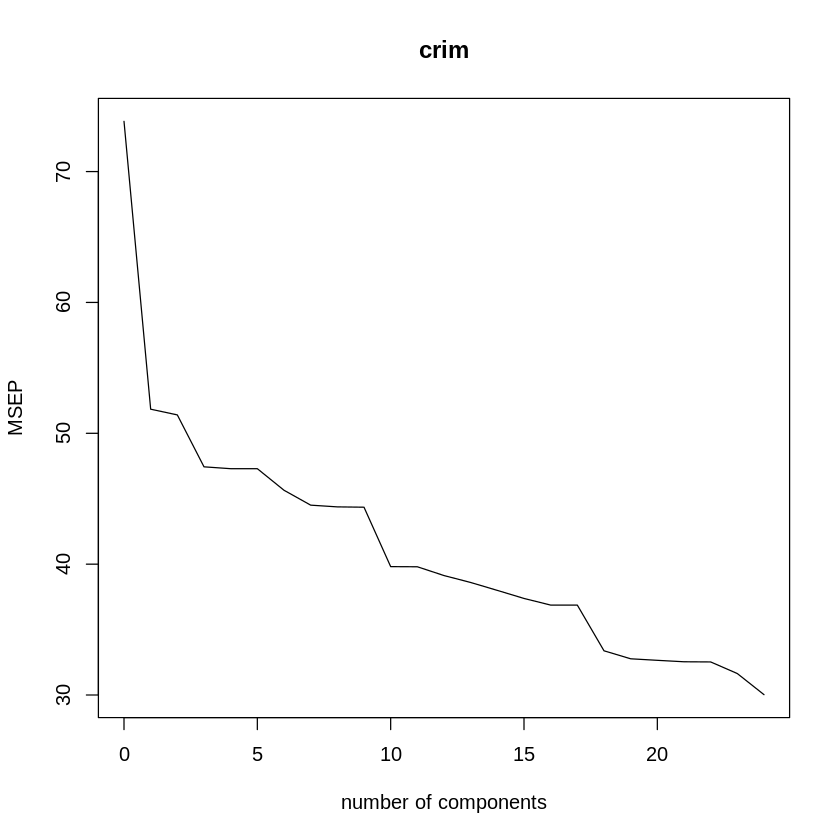

In [ ]:
validationplot(pcr_fit , val.type = "MSEP")

In [ ]:
# funcion que calcula error de prueba UNA vez para UN valor de M
test_M_pcr <- function(M){ # M representa el número de componentes principales en la regresión
  train <- sample(1:n, ntrain)
  pcr_fit <- pcr(crim ~ . + zn:rad + zn:lstat + indus:tax + chas:rm + chas:medv + 
    nox:tax + rm:lstat + dis:rad + dis:medv + rad:medv + tax:lstat + 
    lstat:medv, data = Boston, subset = train, scale = TRUE, validation = "none")
  pcr_pred <- predict(pcr_fit , Boston[-train, ], ncomp = M)
  return(mean((pcr_pred - y[-train])^2))
}
# funcion que calcula error de prueba UNA vez para VARIOS valor de M
test_M_pcr_VEC <- Vectorize(test_M_pcr)
# funcion que calcula error de prueba B-VECES para VARIOS valor de M
test_M_pcr_B <- function(M, B){
  return(replicate(B, test_M_pcr_VEC(M)))
}

In [ ]:
lm_2_stepAIC$call$formula

crim ~ zn + indus + chas + nox + rm + dis + rad + tax + lstat + 
    medv + zn:rad + zn:lstat + indus:tax + chas:rm + chas:medv + 
    nox:tax + rm:lstat + dis:rad + dis:medv + rad:medv + tax:lstat + 
    lstat:medv

In [ ]:
set.seed(1)
t0 = proc.time()
test_M_2000 <- test_M_pcr_B(M=1:24, B=2000)
proc.time() - t0
#   user  system elapsed   Google-Colab (some power)
#395.405   2.525 398.652

   user  system elapsed 
395.405   2.525 398.652 

In [ ]:
#error de prueba
mean_test_M <- apply(test_M_2000, 1, mean)
wminM <- which.min(mean_test_M)
print(wminM)          #24
min(mean_test_M)      #34.281

[1] 24


[1] 34.28187

In [ ]:
#error aparente
#1059279.21251667
pcr_fit0 <- pcr(crim ~ . + zn:rad + zn:lstat + indus:tax + chas:rm + chas:medv + 
    nox:tax + rm:lstat + dis:rad + dis:medv + rad:medv + tax:lstat + 
    lstat:medv, data = Boston, scale = TRUE, validation = "none")
pcr_pred0 <- predict(pcr_fit0, Boston, ncomp = 24)
mean((pcr_pred0 - y)^2) #30.02521

[1] 30.02522

## Plots

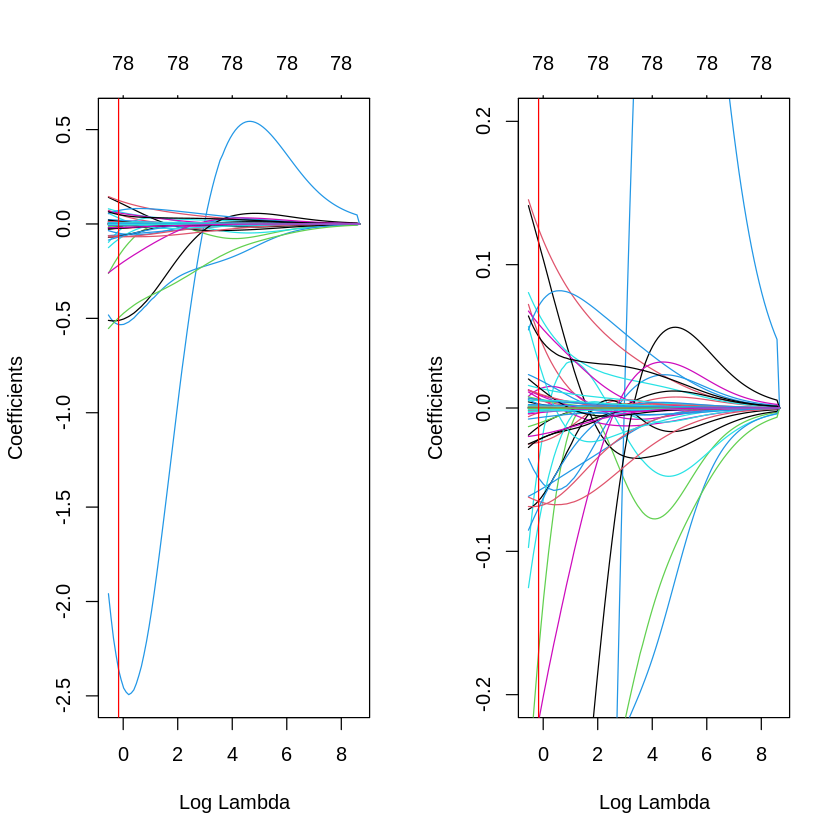

In [ ]:
par(mfrow = c(1,2))
fit_0 <- glmnet(x, y,alpha = 0, relax = F)
plot(fit_0, xvar = "lambda", label = TRUE)
abline(v=log(val_lambda[wmin_RR]), col="red")
plot(fit_0, xvar = "lambda", label = TRUE, ylim = c(-0.2,0.2))
abline(v=log(val_lambda[wmin_RR]), col="red")

In [ ]:
pdf("coef_RR2.pdf", width = 14, height = 5)

par(mfrow = c(1,2))
fit_0 <- glmnet(x, y,alpha = 0, relax = F)
plot(fit_0, xvar = "lambda", label = TRUE)
abline(v=log(val_lambda[wmin_RR]), col="red")
plot(fit_0, xvar = "lambda", label = TRUE, ylim = c(-0.2,0.2))
abline(v=log(val_lambda[wmin_RR]), col="red")

dev.off()

png 
  2

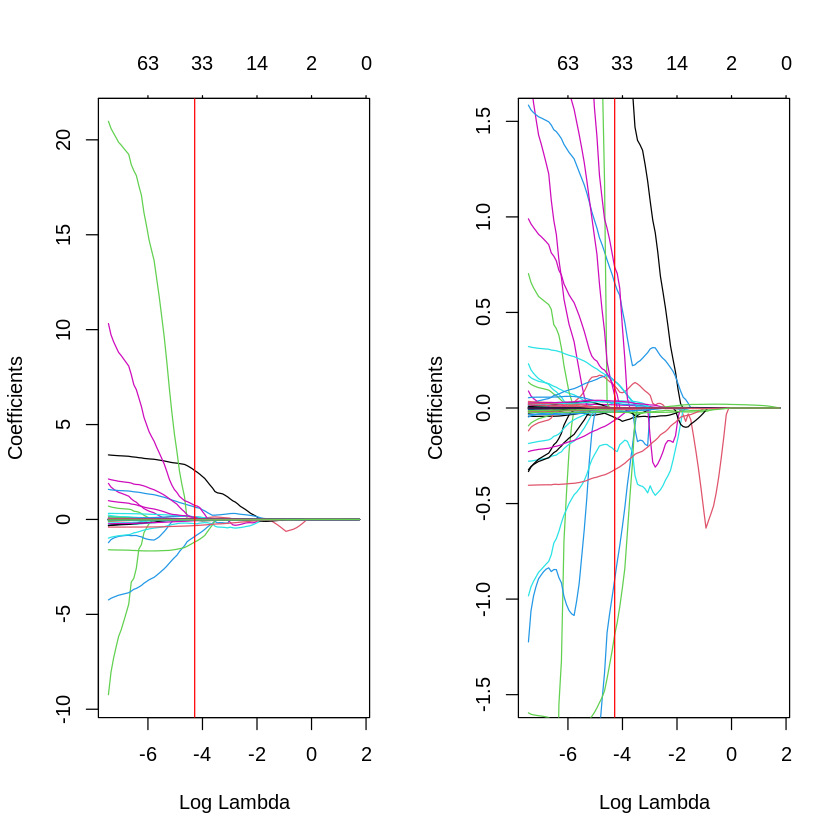

In [ ]:
par(mfrow = c(1,2))
fit_1 <- glmnet(x, y,alpha = 1, relax = F)
plot(fit_1, xvar = "lambda", label = TRUE)
abline(v=log(val_lambda_lasso[wmin_lasso]), col="red")
plot(fit_1, xvar = "lambda", label = TRUE, ylim = c(-1.5,1.5))
abline(v=log(val_lambda_lasso[wmin_lasso]), col="red")

In [ ]:
pdf("coef_lasso2.pdf", width = 14, height = 5)

par(mfrow = c(1,2))
fit_1 <- glmnet(x, y,alpha = 1, relax = F)
plot(fit_1, xvar = "lambda", label = TRUE)
abline(v=log(val_lambda_lasso[wmin_lasso]), col="red")
plot(fit_1, xvar = "lambda", label = TRUE, ylim = c(-1.5,1.5))
abline(v=log(val_lambda_lasso[wmin_lasso]), col="red")

dev.off()

png 
  2

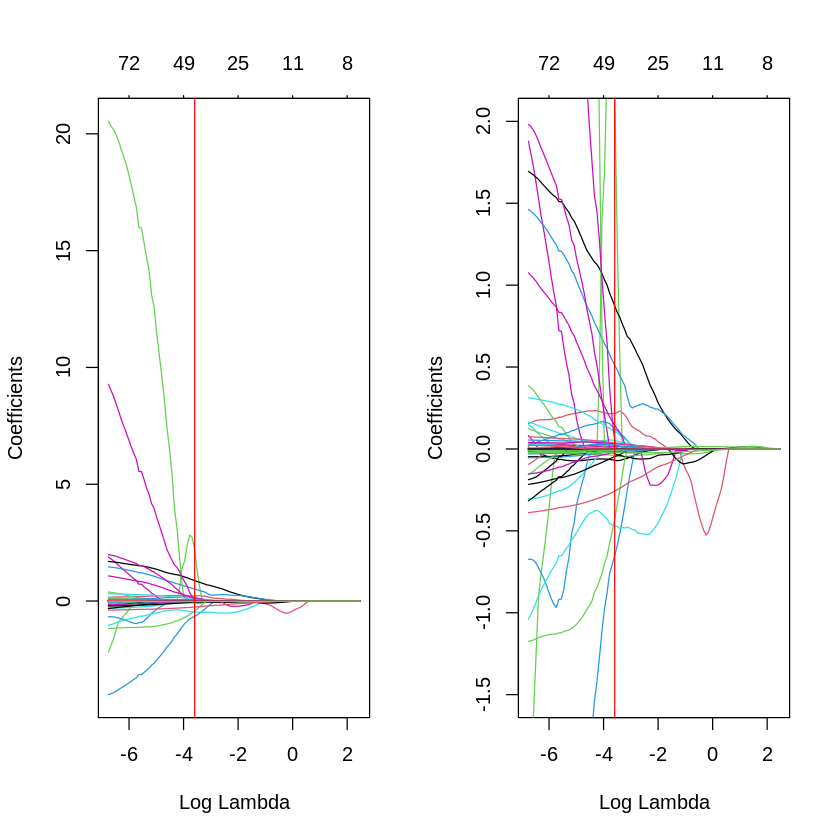

In [ ]:
par(mfrow = c(1,2))
fit_05 <- glmnet(x, y,alpha = 0.5, relax = F)
plot(fit_05, xvar = "lambda", label = TRUE)
abline(v=log(val_lambda_elastic[wmin_elastic]), col="red")
plot(fit_05, xvar = "lambda", label = TRUE, ylim = c(-1.5,2))
abline(v=log(val_lambda_elastic[wmin_elastic]), col="red")

In [ ]:
pdf("coef_elastic2.pdf", width = 14, height = 5)

par(mfrow = c(1,2))
fit_05 <- glmnet(x, y,alpha = 0.5, relax = F)
plot(fit_05, xvar = "lambda", label = TRUE)
abline(v=log(val_lambda_elastic[wmin_elastic]), col="red")
plot(fit_05, xvar = "lambda", label = TRUE, ylim = c(-1.5,2))
abline(v=log(val_lambda_elastic[wmin_elastic]), col="red")

dev.off()

png 
  2

In [ ]:
install.packages("latex2exp")
library(latex2exp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



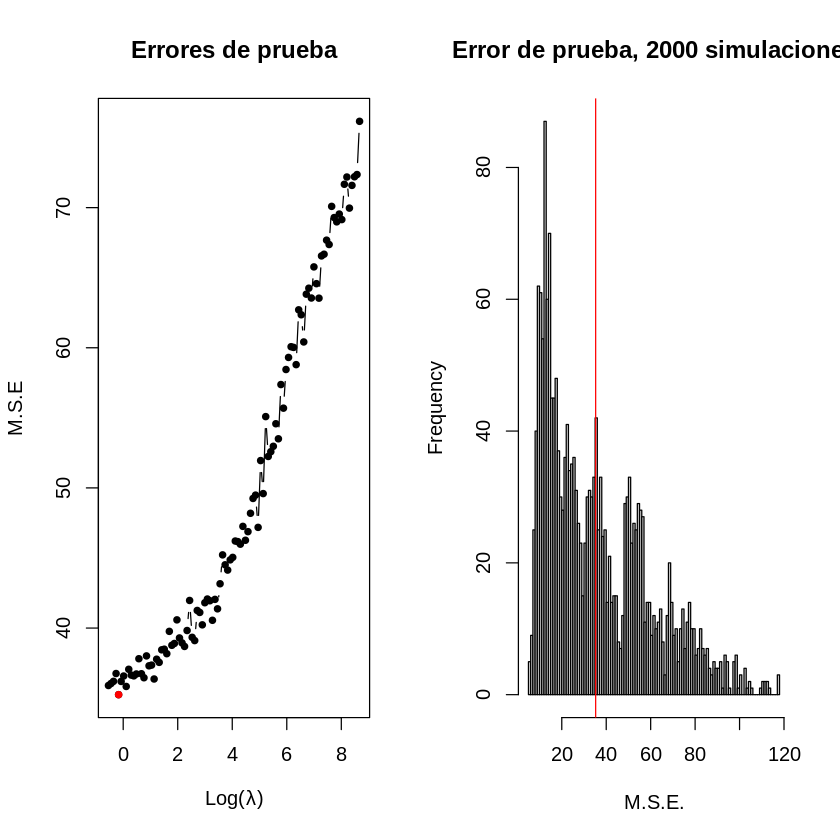

In [ ]:
par(mfrow = c(1,2))
plot(log(val_lambda), mean_test_lambda_RR, type="b", pch=19, cex=0.7, xlab = TeX("Log($\\lambda$)"), ylab="M.S.E", main="Errores de prueba")
points(log(val_lambda[wmin_RR]), min(mean_test_lambda_RR), col="red", pch=19, cex=0.7)

hist(RR_2000_sim, breaks = 100, main="Error de prueba, 2000 simulaciones", xlab="M.S.E.", freq = T)
abline(v = min(mean_test_lambda_RR), col="red")

In [ ]:
pdf("hist_RR2.pdf", width = 12, height = 5)

par(mfrow = c(1,2))
plot(log(val_lambda), mean_test_lambda_RR, type="b", pch=19, cex=0.7, xlab = TeX("Log($\\lambda$)"), ylab="M.S.E", main="Errores de prueba")
points(log(val_lambda[wmin_RR]), min(mean_test_lambda_RR), col="red", pch=19, cex=0.7)

hist(RR_2000_sim, breaks = 100, main="Error de prueba, 2000 simulaciones", xlab="M.S.E.", freq = T)
abline(v = min(mean_test_lambda_RR), col="red")
dev.off()

png 
  2

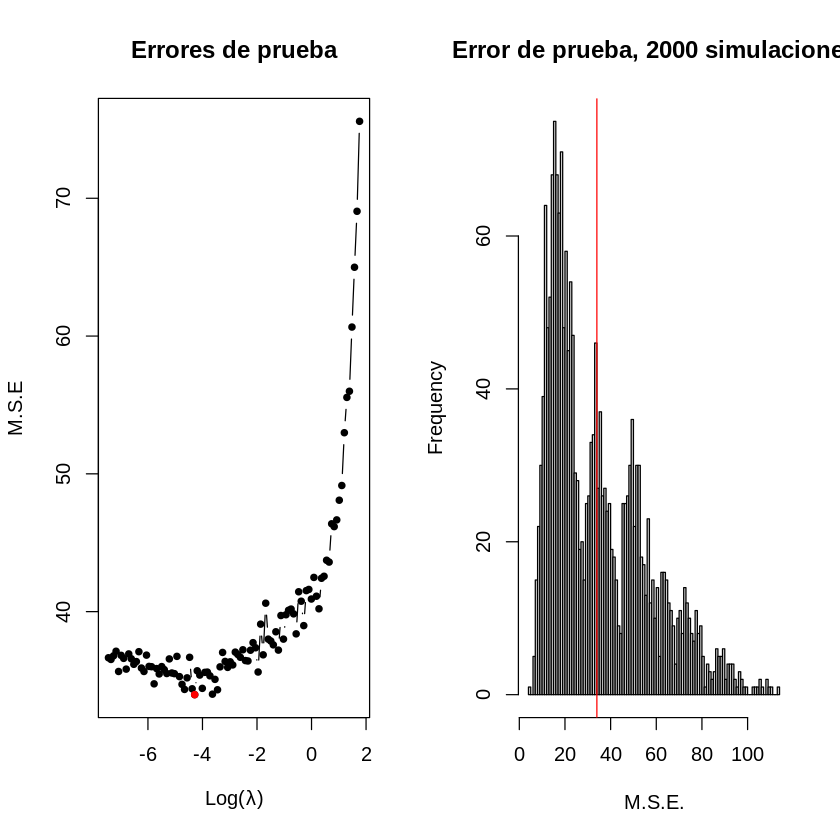

In [ ]:
par(mfrow = c(1,2))
plot(log(val_lambda_lasso), mean_test_lambda_lasso, type="b", pch=19, cex=0.7, xlab = TeX("Log($\\lambda$)"), ylab="M.S.E", main="Errores de prueba")
points(log(val_lambda_lasso[wmin_lasso]), min(mean_test_lambda_lasso), col="red", pch=19, cex=0.7)

hist(lasso_2000_sim, breaks = 100, main="Error de prueba, 2000 simulaciones", xlab="M.S.E.", freq = T)
abline(v = min(mean_test_lambda_lasso), col="red")

In [ ]:
pdf("hist_lasso2.pdf", width = 12, height = 5)

par(mfrow = c(1,2))
plot(log(val_lambda_lasso), mean_test_lambda_lasso, type="b", pch=19, cex=0.7, xlab = TeX("Log($\\lambda$)"), ylab="M.S.E", main="Errores de prueba")
points(log(val_lambda_lasso[wmin_lasso]), min(mean_test_lambda_lasso), col="red", pch=19, cex=0.7)

hist(lasso_2000_sim, breaks = 100, main="Error de prueba, 2000 simulaciones", xlab="M.S.E.", freq = T)
abline(v = min(mean_test_lambda_lasso), col="red")

dev.off()

png 
  2

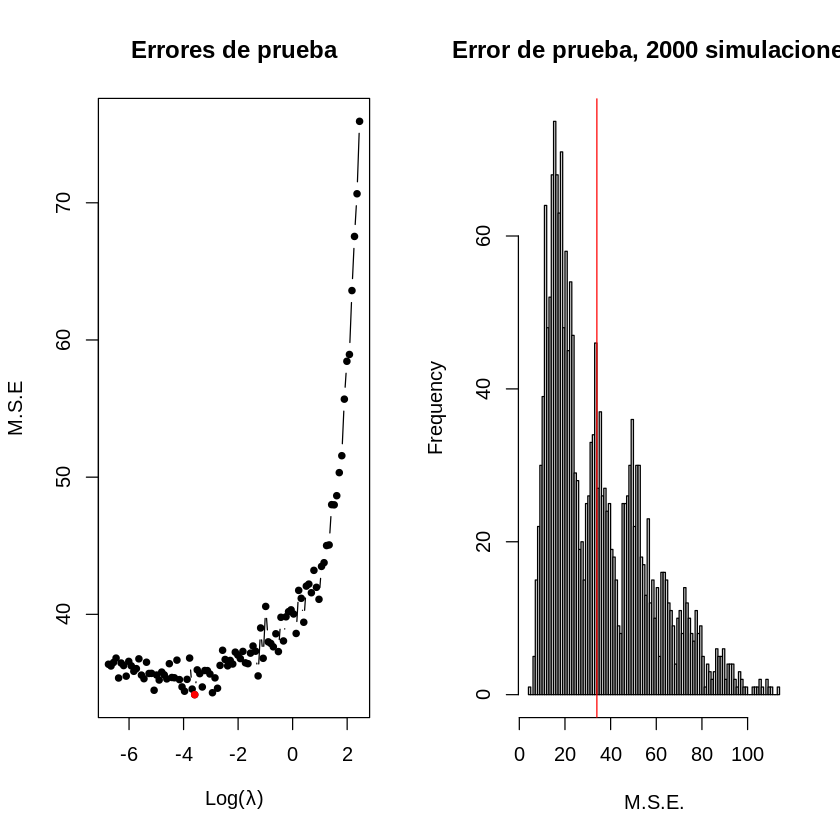

In [ ]:
par(mfrow = c(1,2))
plot(log(val_lambda_elastic), mean_test_lambda_elastic, type="b", pch=19, cex=0.7, xlab = TeX("Log($\\lambda$)"), ylab="M.S.E", main="Errores de prueba")
points(log(val_lambda_elastic[wmin_elastic]), min(mean_test_lambda_elastic), col="red", pch=19, cex=0.7)

hist(lasso_2000_sim, breaks = 100, main="Error de prueba, 2000 simulaciones", xlab="M.S.E.", freq = T)
abline(v = min(mean_test_lambda_lasso), col="red")

In [ ]:
pdf("hist_elastic2.pdf", width = 12, height = 5)

par(mfrow = c(1,2))
plot(log(val_lambda_elastic), mean_test_lambda_elastic, type="b", pch=19, cex=0.7, xlab = TeX("Log($\\lambda$)"), ylab="M.S.E", main="Errores de prueba")
points(log(val_lambda_elastic[wmin_elastic]), min(mean_test_lambda_elastic), col="red", pch=19, cex=0.7)

hist(lasso_2000_sim, breaks = 100, main="Error de prueba, 2000 simulaciones", xlab="M.S.E.", freq = T)
abline(v = min(mean_test_lambda_lasso), col="red")

dev.off()

png 
  2

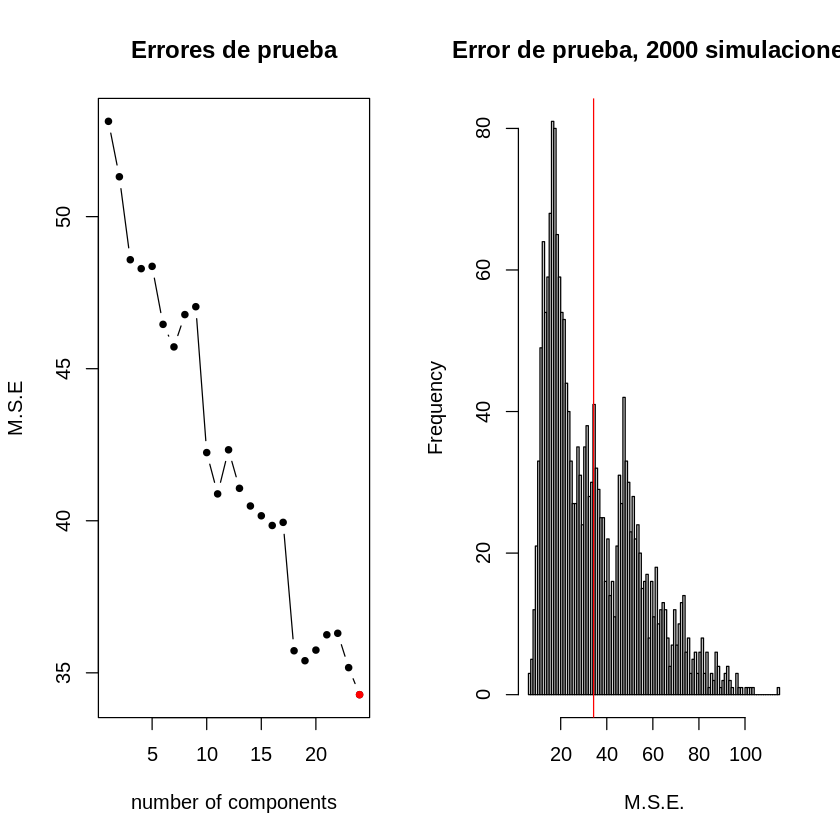

In [ ]:
par(mfrow = c(1,2))
plot(1:24, mean_test_M, type="b", pch=19, cex=0.7, xlab = "number of components", ylab="M.S.E", main="Errores de prueba")
points(24, min(mean_test_M), col="red", pch=19, cex=0.7)

hist(test_M_2000[24,], breaks = 100, main="Error de prueba, 2000 simulaciones", xlab="M.S.E.")
abline(v = min(mean_test_M), col="red")

In [ ]:
pdf("hist_pcr2.pdf", width = 12, height = 5)

par(mfrow = c(1,2))
plot(1:24, mean_test_M, type="b", pch=19, cex=0.7, xlab = "number of components", ylab="M.S.E", main="Errores de prueba")
points(24, min(mean_test_M), col="red", pch=19, cex=0.7)

hist(test_M_2000[24,], breaks = 100, main="Error de prueba, 2000 simulaciones", xlab="M.S.E.")
abline(v = min(mean_test_M), col="red")

dev.off()

png 
  2